# BUSINESS UNDERSTANDING

## Overivew

SyriaTel, a leading telecommunications company, has been experiencing customer churn—customers stopping their service or switching to competitors. Customer churn is a critical issue as acquiring new customers is often more expensive than retaining existing ones. Thus, predicting which customers are likely to churn soon and implementing strategies to retain them can significantly impact the company's revenue and growth.

## Business Problem

The primary stakeholder for this project is the Chief Marketing Officer (CMO) of SyriaTel. The CMO is responsible for overseeing the company's marketing strategies and customer retention efforts. By identifying patterns of customer churn, the CMO can implement targeted marketing campaigns and retention strategies to minimize churn rates and enhance customer loyalty.

## Objectives

1. Explain causes of customer churn rate.
2. Predict customer churn rate.
3. Reduce customer churn rate.

## DATA UNDERSTANDING

For this project the dataset we will be using is the SyriaTel Customer Chrun. This data set includes only 1 csv file

In [71]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from scipy.sparse import vstack
import xgboost as xgb
from xgboost import XGBClassifier
from datetime import datetime
import pickle

In [2]:
#Loading the data
df = pd.read_csv(r"C:\Users\willi\OneDrive\Documents\GitHub\DSC-Phase-3-Project-Syriel\bigml_59c28831336c6604c800002a.csv")


In [18]:
df.shape

(3333, 21)

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Understanding the dataset by getting the names of all columns and data types
print("Column names for DataFrame 1:")
print(list(df.columns))

print("\nDataFrame 1 Information:")
df.info()


Column names for DataFrame 1:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

DataFrame 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   n

## Data Preparation

In [5]:
# Next is to check for any missing values in the datasets
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As you can see we have no missing values so there's no need to clean for missing values.

In [6]:
# Check for any duplicates
duplicates = df.duplicated()

num_duplicates = duplicates.sum()

print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


We have no duplicates which makes our data cleaning process much simpler

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Visualization

Before modelling we need to understand our data and to do this we can use visualizations. To try and spot trends and answer some of our objectives even before modelling.

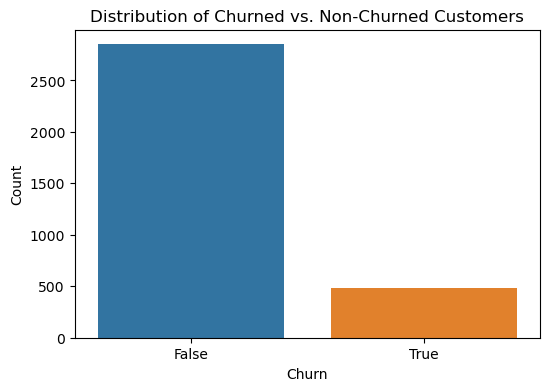

In [8]:
# Create a bar plot for churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

We have a higher number of customers that do not churn compared to customers that do churn which is a good sign

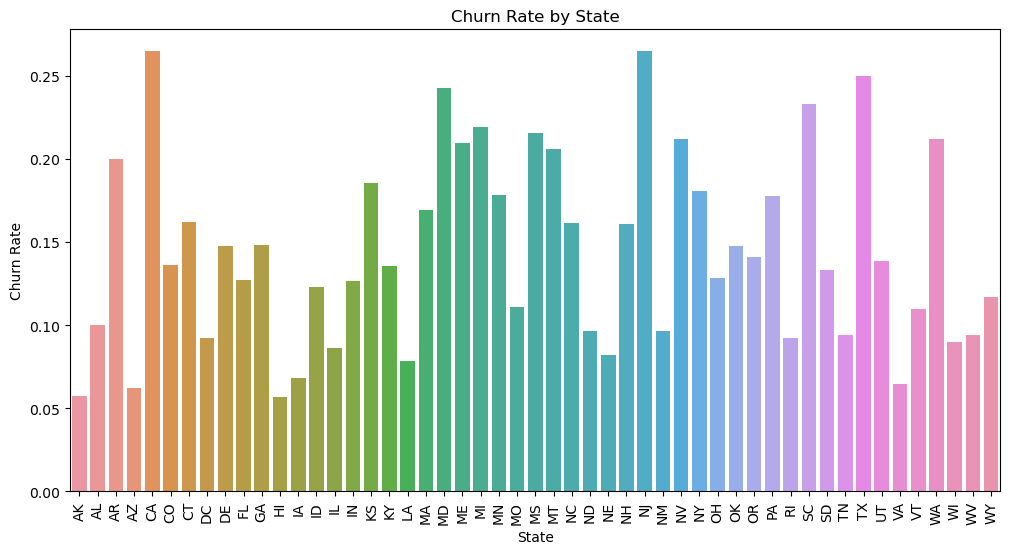

In [9]:
# Churn Rate by State
churn_by_state = df.groupby('state')['churn'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='churn', data=churn_by_state)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()


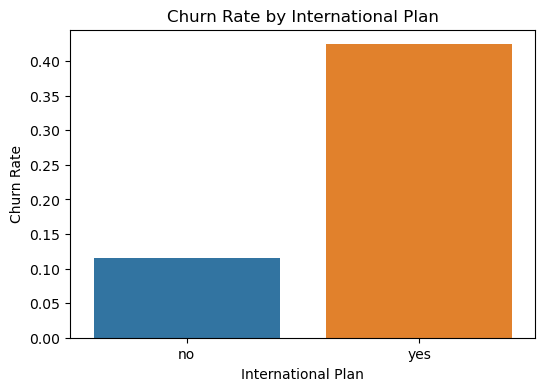

In [10]:
churn_by_international_plan = df.groupby('international plan')['churn'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='international plan', y='churn', data=churn_by_international_plan)
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.show()


International Plans seem to have a higher churn rate than the national one

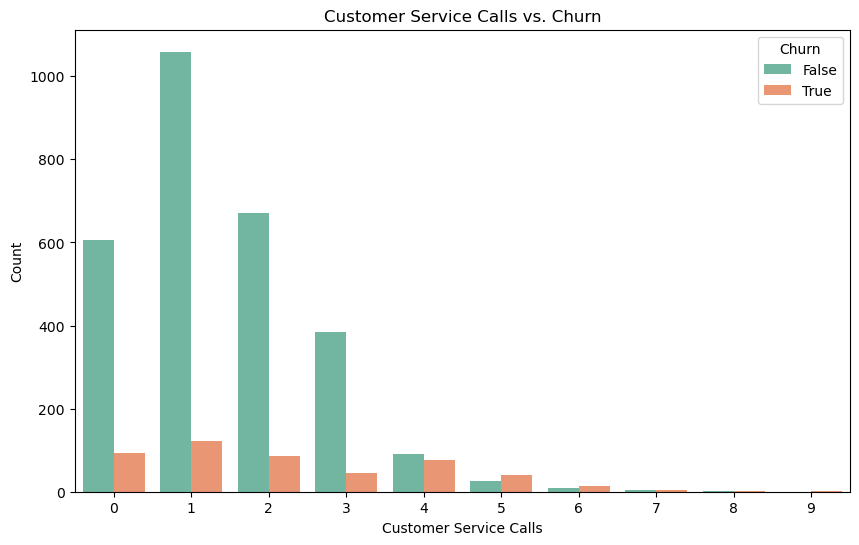

In [70]:
#Churn vs customer service calls
df_copy = df.copy()

df_copy['churn'] = df_copy['churn'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(x='customer service calls', hue='churn', data=df_copy, palette='Set2')
plt.title('Customer Service Calls vs. Churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()




The higher the number of customer service calls the less likely a customer is to churn

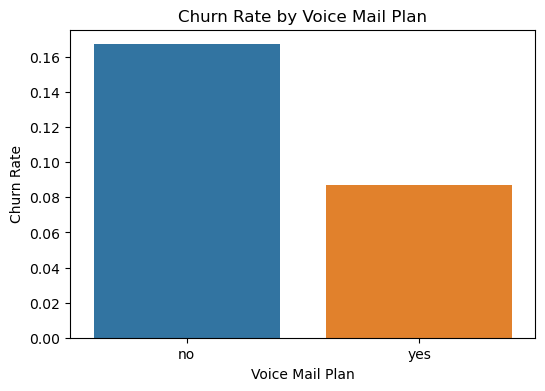

In [13]:
#Churn Rate by Voice Mail Plan
churn_by_voice_mail_plan = df.groupby('voice mail plan')['churn'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='voice mail plan', y='churn', data=churn_by_voice_mail_plan)
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.show()


There seems to be an unusually high number of customers that are on the voice mail plan that churn

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


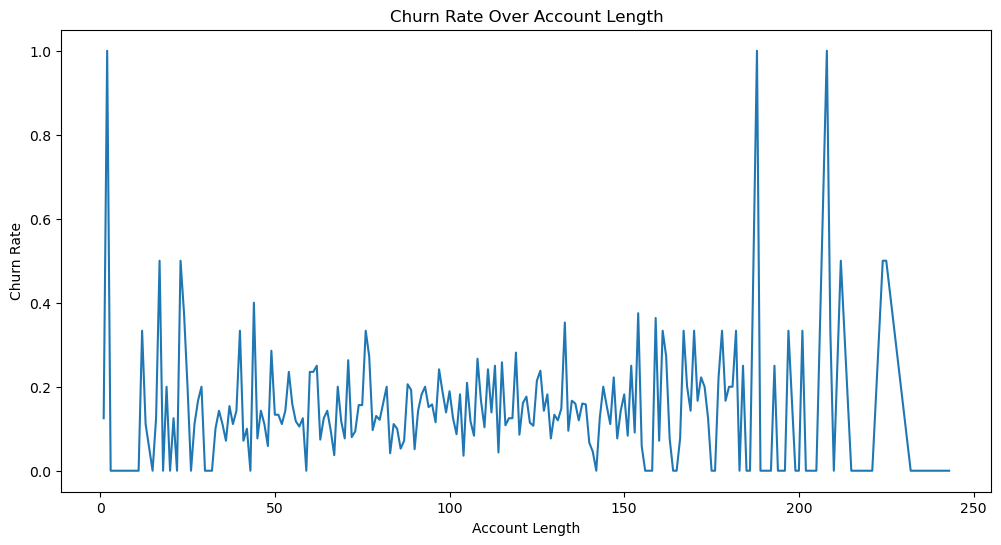

In [12]:
#Churn Rate Over Account Length
churn_by_account_length = df.groupby('account length')['churn'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='account length', y='churn', data=churn_by_account_length)
plt.title('Churn Rate Over Account Length')
plt.xlabel('Account Length')
plt.ylabel('Churn Rate')
plt.show()


Churn rate seems to be the highest when the account is newest then decreases but increases the older the account gets at around 200

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


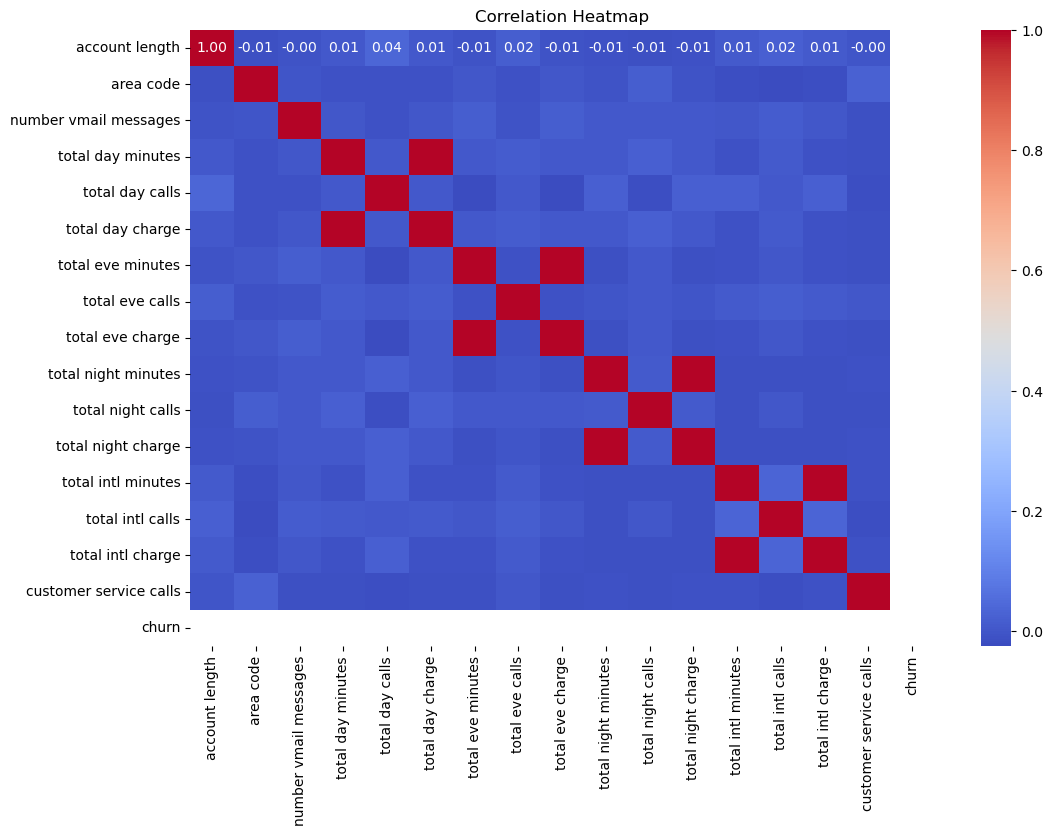

In [16]:
#Correlation heatmap
df_temp = df.copy()
df_temp['churn'] = df_temp['churn'].map({'True': 1, 'False': 0})

numerical_columns = df_temp.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df_temp[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap indicates that there is no strong correlation between customer churn and any other numerical features in the dataset, with all correlation coefficients near zero. This suggests that churn is not directly influenced by any single numerical factor in the dataset.

## Modelling

Now that we have visualized and we have more information about our dataset through visualizations, it is time to begin modelling preparations and modelling.

In [19]:
# Drop irrelevant columns
df = df.drop(columns=['phone number'])

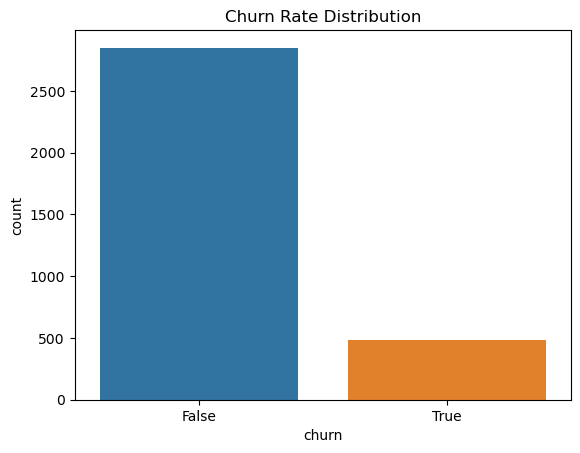

churn
False    2850
True      483
Name: count, dtype: int64


In [24]:
# Check the distribution of the target variable
sns.countplot(x='churn', data=df)
plt.title('Churn Rate Distribution')
plt.show()

print(df['churn'].value_counts())

Next we will create a pipeline in order to streamline our workflow that will include a scaler for numerical data, OneHotEncoder for categorical data and the train test split. Seeing that our target variable churn is imbalanced we should incorporate SMOTE

In [21]:
# Target Variable is churn categorical and numerical columns split in order to scale and OneHotEncode them 
# pipeline is created and fitted to be trained and tested
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ['state', 'international plan', 'voice mail plan']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [25]:
# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

Now that our modelling preparations are done it is time to create our baseline model. We will use a logistic regression model.

In [26]:
# Create and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test_preprocessed)
y_pred_proba = logistic_regression_model.predict_proba(X_test_preprocessed)[:, 1]


In [30]:
#Logistic Regression Evaluation using cross validation
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get the scores
cv_accuracy = cross_val_score(logistic_regression_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(logistic_regression_model, X_train_resampled, y_train_resampled, cv=cv, scoring='precision')
cv_recall = cross_val_score(logistic_regression_model, X_train_resampled, y_train_resampled, cv=cv, scoring='recall')
cv_f1 = cross_val_score(logistic_regression_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
cv_roc_auc = cross_val_score(logistic_regression_model, X_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc')

print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.4f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.4f}")
print(f"Cross-Validation F1 Score: {cv_f1.mean():.4f}")
print(f"Cross-Validation ROC AUC Score: {cv_roc_auc.mean():.4f}")

# Train the model on the resampled training data
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test_preprocessed)
y_pred_proba = logistic_regression_model.predict_proba(X_test_preprocessed)[:, 1]

# Logistic Regression Evaluation on Test Set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set Precision: {precision:.4f}")
print(f"Test Set Recall: {recall:.4f}")
print(f"Test Set F1 Score: {f1:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc:.4f}")

Cross-Validation Accuracy: 0.7824
Cross-Validation Precision: 0.7776
Cross-Validation Recall: 0.7912
Cross-Validation F1 Score: 0.7842
Cross-Validation ROC AUC Score: 0.8441
Test Set Accuracy: 0.7811
Test Set Precision: 0.3869
Test Set Recall: 0.7624
Test Set F1 Score: 0.5133
Test Set ROC AUC Score: 0.8295


The cross-validation metrics are generally consistent, indicating that the model performs well during training and validation. The slightly lower performance on the test set suggests some overfitting.

The ROC AUC scores indicate that the model has good discriminatory power both during cross-validation and on the test set. The decline in F1 score on the test set suggests the need for further tuning or additional features to improve the balance between precision and recall.

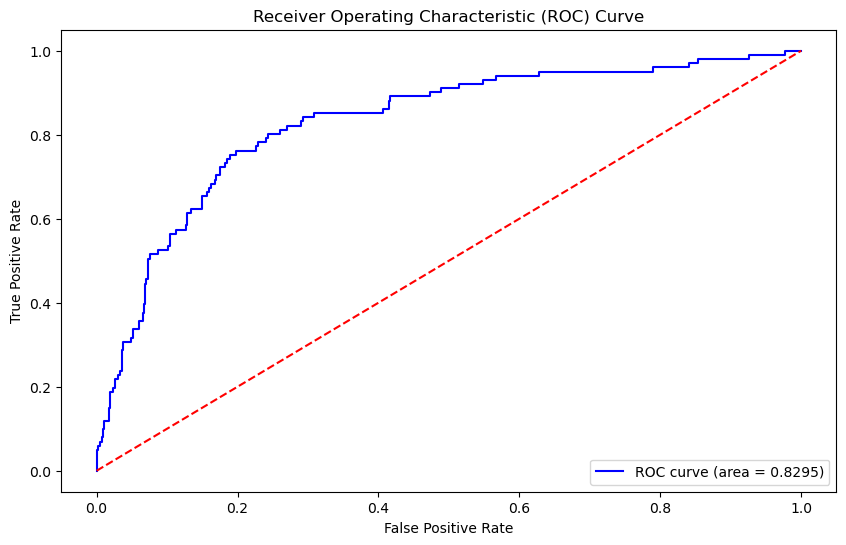

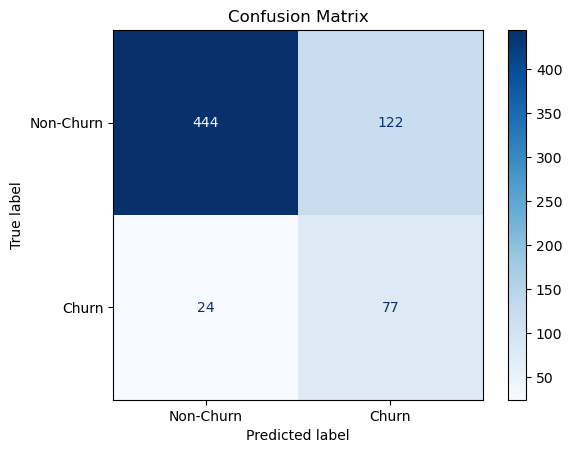

In [32]:
# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#DataFrame to see the actual vs predicted values
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Label': y_pred,
    'Predicted_Probability': y_pred_proba
})

print(predictions.head())

      Actual  Predicted_Label  Predicted_Probability
438    False            False               0.398274
2674   False            False               0.023069
1345    True            False               0.092138
1957   False            False               0.349521
2148   False            False               0.101281


The complex model that we will be using is XGBoost

In [42]:
# Define the model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')


In [43]:
#Model Evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get the scores
cv_accuracy = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='precision')
cv_recall = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='recall')
cv_f1 = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
cv_roc_auc = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc')

print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.4f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.4f}")
print(f"Cross-Validation F1 Score: {cv_f1.mean():.4f}")
print(f"Cross-Validation ROC AUC Score: {cv_roc_auc.mean():.4f}")

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict 
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost - Test Set Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Test Set Precision: {precision_xgb:.4f}")
print(f"XGBoost - Test Set Recall: {recall_xgb:.4f}")
print(f"XGBoost - Test Set F1 Score: {f1_xgb:.4f}")
print(f"XGBoost - Test Set ROC AUC Score: {roc_auc_xgb:.4f}")


Cross-Validation Accuracy: 0.9715
Cross-Validation Precision: 0.9804
Cross-Validation Recall: 0.9623
Cross-Validation F1 Score: 0.9713
Cross-Validation ROC AUC Score: 0.9915
XGBoost - Test Set Accuracy: 0.9580
XGBoost - Test Set Precision: 0.9101
XGBoost - Test Set Recall: 0.8020
XGBoost - Test Set F1 Score: 0.8526
XGBoost - Test Set ROC AUC Score: 0.9261


The XGBoost model performs impressively, showing high accuracy (97.15%) during cross-validation and showing solid precision (98.04%) and recall (96.23%), indicating its efficiency for spotting churn instances accurately. On the test set, it maintains an acceptable accuracy of 95.80% and demonstrates decent precision (91.01%) and recall (80.20%), affirming its reliability in practical scenarios.


Extract features so we can gain insights into feature importance, which will explain to us the causes of customer churn.

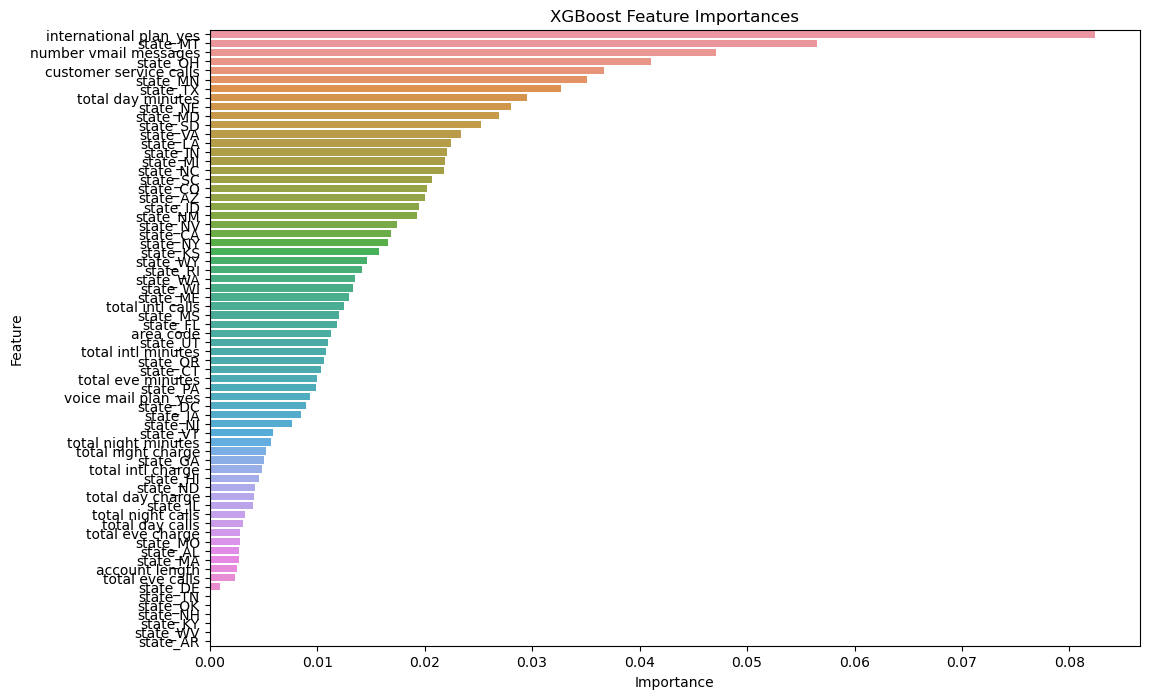

In [44]:
# Extract and plot feature importances
feature_importances_xgb = xgb_model.feature_importances_
features = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

importance_df_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb)
plt.title('XGBoost Feature Importances')
plt.show()

The plot above is quite messy due to the sheer number of variables that affect the model's prediction. But we can get a list of them. 

In [65]:
for index, row in importance_df_xgb.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

international plan_yes: 0.0824
state_MT: 0.0565
number vmail messages: 0.0471
state_OH: 0.0411
customer service calls: 0.0367
state_MN: 0.0351
state_TX: 0.0327
total day minutes: 0.0295
state_NE: 0.0281
state_MD: 0.0269
state_SD: 0.0252
state_VA: 0.0234
state_LA: 0.0224
state_IN: 0.0221
state_MI: 0.0219
state_NC: 0.0218
state_SC: 0.0207
state_CO: 0.0202
state_AZ: 0.0200
state_ID: 0.0195
state_NM: 0.0193
state_NV: 0.0174
state_CA: 0.0168
state_NY: 0.0166
state_KS: 0.0157
state_WY: 0.0147
state_RI: 0.0141
state_WA: 0.0135
state_WI: 0.0133
state_ME: 0.0130
total intl calls: 0.0125
state_MS: 0.0120
state_FL: 0.0119
area code: 0.0113
state_UT: 0.0110
total intl minutes: 0.0109
state_OR: 0.0107
state_CT: 0.0103
total eve minutes: 0.0100
state_PA: 0.0099
voice mail plan_yes: 0.0093
state_DC: 0.0090
state_IA: 0.0085
state_NJ: 0.0076
state_VT: 0.0059
total night minutes: 0.0057
total night charge: 0.0052
state_GA: 0.0051
total intl charge: 0.0048
state_HI: 0.0046
state_ND: 0.0042
total day char

From what we can see here the features that influence the model the most are international plan, number vmail messages, some States, customer service calls and total day minutes.

In [46]:
# Predict on the test set
y_pred = xgb_model.predict(X_test_preprocessed)
y_pred_proba = xgb_model.predict_proba(X_test_preprocessed)[:, 1]

# Create a DataFrame to see the actual vs predicted values
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Label': y_pred,
    'Predicted_Probability': y_pred_proba
})

print(predictions.head())


      Actual  Predicted_Label  Predicted_Probability
438    False                0               0.200416
2674   False                0               0.000693
1345    True                1               0.995465
1957   False                0               0.007562
2148   False                0               0.001799


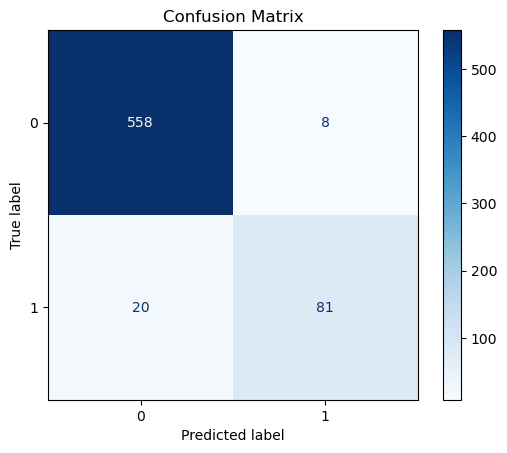

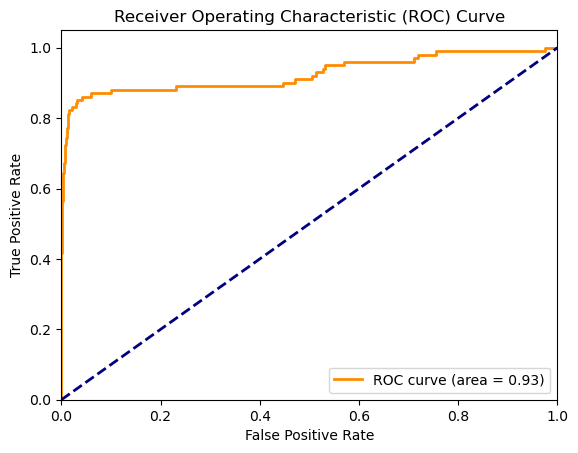

In [51]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In order to create a better performing model than the one we just created we will be using a GridSearch to find the best parameters

In [52]:

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


Next is to implement these parameters to get a model as accurate as possible

In [54]:
best_xgb_model = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

best_xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
#Model evaluation
cross_val_accuracy = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy').mean()
cross_val_precision = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='precision').mean()
cross_val_recall = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='recall').mean()
cross_val_f1 = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1').mean()
cross_val_roc_auc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc').mean()

print(f"Cross-Validation Accuracy: {cross_val_accuracy:.4f}")
print(f"Cross-Validation Precision: {cross_val_precision:.4f}")
print(f"Cross-Validation Recall: {cross_val_recall:.4f}")
print(f"Cross-Validation F1 Score: {cross_val_f1:.4f}")
print(f"Cross-Validation ROC AUC Score: {cross_val_roc_auc:.4f}")

# Test set evaluation
y_pred_best = best_xgb_model.predict(X_test_preprocessed)
y_pred_proba_best = best_xgb_model.predict_proba(X_test_preprocessed)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print(f"Test Set Accuracy: {accuracy_best:.4f}")
print(f"Test Set Precision: {precision_best:.4f}")
print(f"Test Set Recall: {recall_best:.4f}")
print(f"Test Set F1 Score: {f1_best:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_best:.4f}")

Cross-Validation Accuracy: 0.9726
Cross-Validation Precision: 0.9800
Cross-Validation Recall: 0.9650
Cross-Validation F1 Score: 0.9724
Cross-Validation ROC AUC Score: 0.9919
Test Set Accuracy: 0.9580
Test Set Precision: 0.9011
Test Set Recall: 0.8119
Test Set F1 Score: 0.8542
Test Set ROC AUC Score: 0.9229


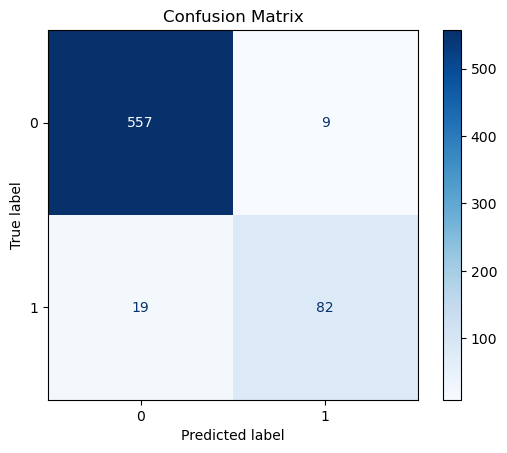

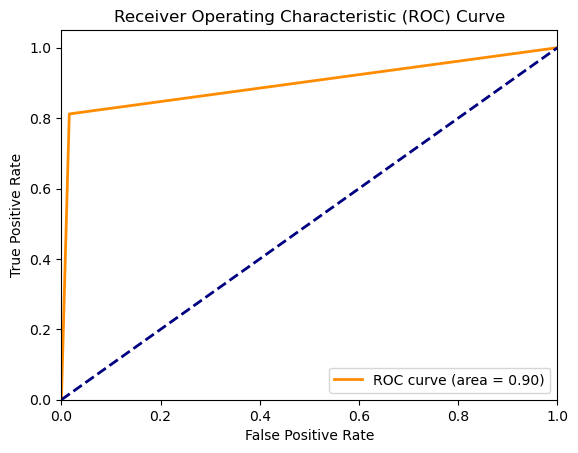

In [59]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

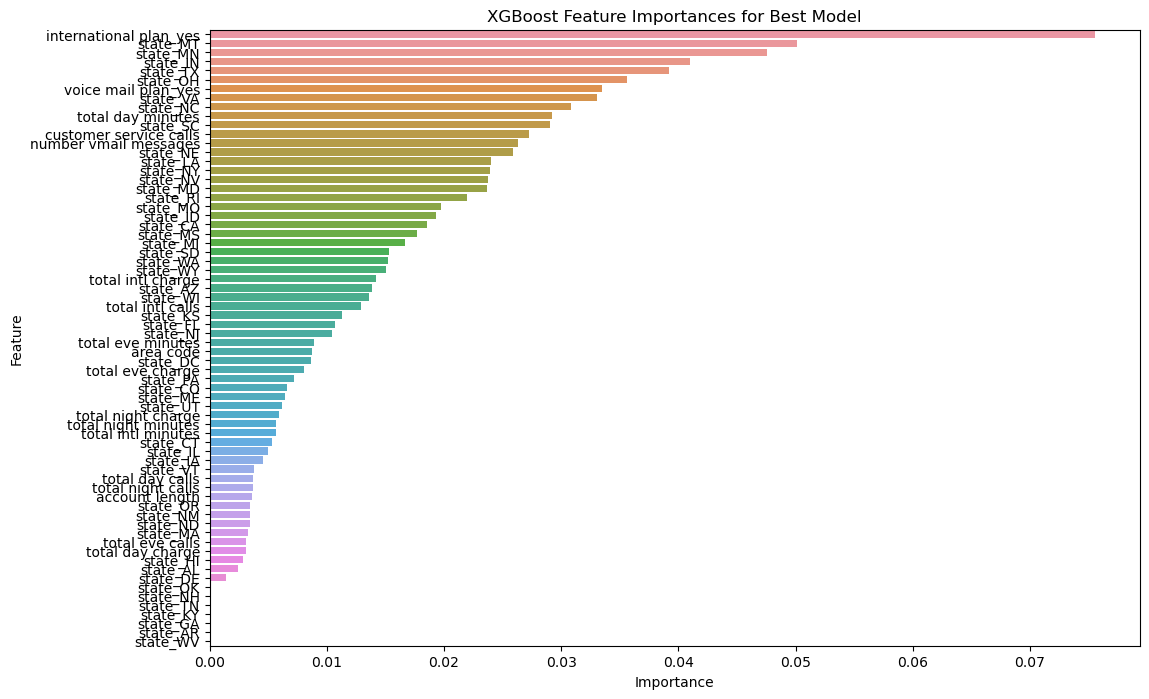

In [61]:
#Feature importance for the revised xgb model

feature_importances_best_xgb = best_xgb_model.feature_importances_

# Get the feature names after preprocessing
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numerical_features = numerical_cols

all_features = numerical_features + list(categorical_features)

# Create a DataFrame with feature names and their importance
importance_df_best_xgb = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_best_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_best_xgb)
plt.title('XGBoost Feature Importances for Best Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [62]:
# Print the feature importances in order of importance
for index, row in importance_df_best_xgb.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

international plan_yes: 0.0756
state_MT: 0.0501
state_MN: 0.0475
state_IN: 0.0410
state_TX: 0.0392
state_OH: 0.0356
voice mail plan_yes: 0.0335
state_VA: 0.0331
state_NC: 0.0308
total day minutes: 0.0292
state_SC: 0.0291
customer service calls: 0.0272
number vmail messages: 0.0263
state_NE: 0.0259
state_LA: 0.0240
state_NY: 0.0239
state_NV: 0.0238
state_MD: 0.0237
state_RI: 0.0219
state_MO: 0.0198
state_ID: 0.0193
state_CA: 0.0186
state_MS: 0.0177
state_MI: 0.0166
state_SD: 0.0153
state_WA: 0.0152
state_WY: 0.0150
total intl charge: 0.0142
state_AZ: 0.0138
state_WI: 0.0136
total intl calls: 0.0129
state_KS: 0.0113
state_FL: 0.0107
state_NJ: 0.0104
total eve minutes: 0.0089
area code: 0.0087
state_DC: 0.0086
total eve charge: 0.0081
state_PA: 0.0072
state_CO: 0.0066
state_ME: 0.0064
state_UT: 0.0062
total night charge: 0.0059
total night minutes: 0.0057
total intl minutes: 0.0057
state_CT: 0.0053
state_IL: 0.0050
state_IA: 0.0045
state_VT: 0.0038
total day calls: 0.0037
total night call

Just like the initial xgboost the features with the greatest influence on the model are international plan, some states, voice mail plan, total day minutes, customer service calls and number of vmail messages.

## Final Evaluation

We have built 3 different models a logistic regression model and two xgboost models. Based on the performance of the models the best model to go with is either the first or the second xgboost model with the revised parameters. Looking at the accuracy, precision, recall, F1 score and ROC AUC score there is almost nothing to differentiate the two. But after looking at the ROC AUC curve of both models, the initial xgboost is the better model to use due to the fact that the ROC curve is closer to the top left corner than the second model. In addition to that it also has a slightly better ROC curve Area.

So for this project I will recommend using the first xgboost model, not the one with the adjusted parameters.

Now that we have concluded that the model we want to use is the initial xgboost model that we created we can save it with pickle to use it for later.

In [72]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Recommendations

#### Explaining Causes of Customer Churn:

International Plan: Customers with an international plan are more likely to churn. This could be due to high costs or dissatisfaction with the plan.

Total Day Minutes: Higher usage during the day might correlate with churn, possibly indicating that high-usage customers are more sensitive to service quality or pricing.

Voice Mail Plan: Customers without a voice mail plan are less likely to churn, suggesting that the voice mail plan might not be meeting customer needs.

Customer Service Calls: Customers that receive frequent customer service calls(above 5) are less likely to churn, suggesting that Syriel should increase the number of customer service calls that they make.

#### Predicting Churn:
The xgboost model that we will be using achieves an accuracy of 96% and a ROC AUC score of 92%, indicating strong predictive power and the model's ability to discriminate between classes eliminating bias

#### Reducing Churn:
Focus retention efforts on customers with high predicted churn probabilities, offering tailored incentives and improving service quality in identified areas. 
Which can be done by offering a more incentivized international plan package e.g with better rates. Ensure high quality services to customers that use the product the most as they bring in the most money and losing them would cost the company a lot. Offer a voice mail plan to more customers as it is seen that they are less likely to churn. Finally, communicate with the customers through customer service calls as you can be able to gain their feedback and implement what they are suggesting. As it is seen that churn rate reduces as customer service calls increase.
